In [16]:
import numpy as np
from multiprocessing import Pool
import time
import matplotlib.pyplot as plt
import pandas as pd
import SGD_with_k_samples
import random

In [18]:
# Loading the dataset
dataframe = pd.read_excel('dataset1/dataset1.xlsx')

X = dataframe['V'].sort_values()
X = (X - X.mean()) / X.std()
y = dataframe['AT'][X.index].values
y = (y - y.mean()) / y.std()

X = np.reshape(X.values, (-1, 1))

def polynomial_basis_function_transformation(X, h):
    powers = np.arange(h)
    X_poly = np.power(X, powers)
    return X_poly



In [20]:
def compute_gradient(args):
    """
    Compute the gradient of the loss function for a mini-batch of data.
    """
    X_batch, y_batch, alpha = args
    X_poly = polynomial_basis_function_transformation(X_batch, 4)
    m = len(y_batch)  # Mini-batch size
    predictions = X_poly.dot(alpha)  # Linear regression predictions
    errors = predictions - y_batch
    gradient = (1 / m) * X_poly.T.dot(errors)
    return gradient

def parallel_sgd_with_k_samples(X, y, alpha, learning_rate, epochs, num_threads, k):
    """
    Implements parallelized stochastic gradient descent with k samples.
    """
    mse_history = []
    time_taken = []
    pool = Pool(processes=num_threads)  # Create a pool of workers
    start_time = time.time()

    for epoch in range(epochs):
        
        
        # Shuffle data
        indices = np.random.choice(len(y), size=i(k*num_threads), replace=True)
        random.shuffle(indices)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        X_poly = polynomial_basis_function_transformation(X_shuffled, 4)

        # Split data into mini-batches
        mini_batches = [
            (X_shuffled[i:i+k], y_shuffled[i:i+k], alpha)
            for i in range(0, (k*num_threads), k)
        ]

        # Compute gradients in parallel
        gradients = pool.map(compute_gradient, mini_batches)

        # Average the gradients across all threads
        avg_gradient = np.mean(gradients, axis=0)

        # Update parameters (alpha)
        alpha -= learning_rate * avg_gradient

        # Calculate MSE
        mse = np.mean((X_poly.dot(alpha) - y) ** 2)  # MSE using the updated parameters
        mse_history.append(mse)

        # Calculate time taken for the epoch
        end_time = time.time()
        elapsed_time = end_time - start_time
        time_taken.append(elapsed_time)



    pool.close()
    pool.join()
    
    return mse_history, time_taken


In [22]:
def estimation(n, X, y, learning_rate, epochs, num_threads, k):
    df_mse_rows = []
    df_time_rows = []
    for _ in range(n):
        alpha = np.random.rand(4)
        mse, time = parallel_sgd_with_k_samples(X, y, alpha, learning_rate, epochs, num_threads, k)  # Call the function
        df_mse_rows.append(mse)  
        df_time_rows.append(time)
    df_mse = pd.DataFrame(df_mse_rows)
    df_time = pd.DataFrame(df_time_rows)
    df_mse_avg = df_mse.mean(axis=0)
    df_time_avg = df_time.mean(axis=0)
    return df_mse_avg, df_time_avg




In [26]:
import inspect
print(inspect.getsource(parallel_sgd_with_k_samples))

def parallel_sgd_with_k_samples(X, y, alpha, learning_rate, epochs, num_threads, k):
    """
    Implements parallelized stochastic gradient descent with k samples.
    """
    mse_history = []
    time_taken = []
    pool = Pool(processes=num_threads)  # Create a pool of workers
    start_time = time.time()

    for epoch in range(epochs):
        
        
        # Shuffle data
        indices = np.random.choice(len(y), size=i(k*num_threads), replace=True)
        random.shuffle(indices)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        X_poly = polynomial_basis_function_transformation(X_shuffled, 4)

        # Split data into mini-batches
        mini_batches = [
            (X_shuffled[i:i+k], y_shuffled[i:i+k], alpha)
            for i in range(0, (k*num_threads), k)
        ]

        # Compute gradients in parallel
        gradients = pool.map(compute_gradient, mini_batches)

        # Average the gradients across all threads
        avg_gradient = np.mean

1737425518.230384
1737425975.975911
1737426298.111255
1737426539.516756
1737426741.431861
1737426924.439968
1737427114.4866638


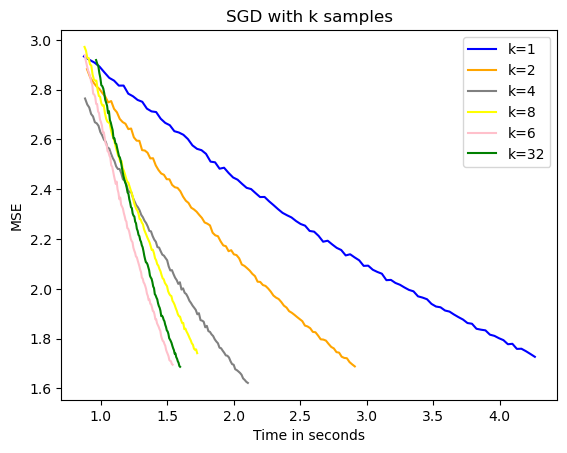

In [35]:
# Hyperparameters
learning_rate = 0.001
epochs = 100
num_threads = 16  # Number of threads
#k = 16  # Number of points each thread processes per batch

if __name__ == "__main__":
    print(time.time())
    mse_1,time_1 = SGD_with_k_samples.estimation(100, X, y, learning_rate, epochs, num_threads, 1)
    print(time.time())
    mse_2,time_2 = SGD_with_k_samples.estimation(100,X, y, learning_rate, epochs, num_threads, 2)
    print(time.time())
    mse_4,time_4 = SGD_with_k_samples.estimation(100,X, y, learning_rate, epochs, num_threads, 4)
    print(time.time())
    mse_8,time_8 = SGD_with_k_samples.estimation(100,X, y, learning_rate, epochs, num_threads, 8)
    print(time.time())
    mse_16,time_16 = SGD_with_k_samples.estimation(100,X, y, learning_rate, epochs, num_threads, 16)
    print(time.time())
    mse_32,time_32 = SGD_with_k_samples.estimation(100,X, y, learning_rate, epochs, num_threads, 32)
    print(time.time())
    plt.xlabel('Time in seconds')
    plt.ylabel('MSE')
    plt.title('SGD with k samples')
    plt.plot(time_1,mse_1, label = "k=1", color="blue", linestyle="-")
    plt.plot(time_2,mse_2, label = "k=2", color="orange", linestyle="-")
    plt.plot(time_4,mse_4, label = "k=4", color="grey", linestyle="-")
    plt.plot(time_8,mse_8, label = "k=8", color="yellow", linestyle="-")
    plt.plot(time_16,mse_16, label = "k=6", color="pink", linestyle="-")
    plt.plot(time_32,mse_32, label = "k=32", color="green", linestyle="-")
    plt.legend()

1737427114.588049
1737427637.571445
1737427928.081813
1737428102.779368
1737428216.6576781
1737428304.041168
1737428376.603792


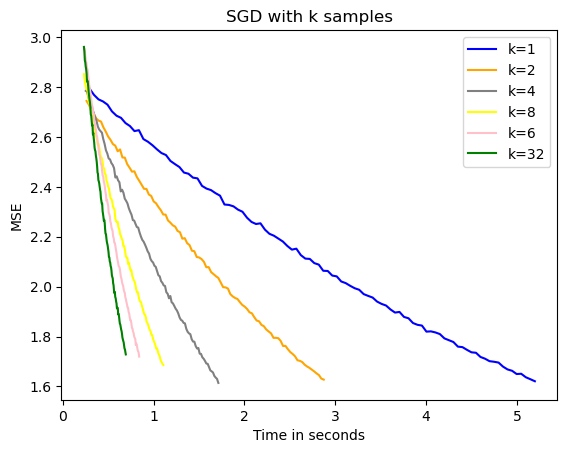

In [36]:
# Hyperparameters
learning_rate = 0.001
epochs = 100
num_threads = 1  # Number of threads
#k = 16  # Number of points each thread processes per batch

if __name__ == "__main__":
    print(time.time())
    mse_1,time_1 = SGD_with_k_samples.estimation(100, X, y, learning_rate, epochs, num_threads, 1)
    print(time.time())
    mse_2,time_2 = SGD_with_k_samples.estimation(100,X, y, learning_rate, epochs, num_threads, 2)
    print(time.time())
    mse_4,time_4 = SGD_with_k_samples.estimation(100,X, y, learning_rate, epochs, num_threads, 4)
    print(time.time())
    mse_8,time_8 = SGD_with_k_samples.estimation(100,X, y, learning_rate, epochs, num_threads, 8)
    print(time.time())
    mse_16,time_16 = SGD_with_k_samples.estimation(100,X, y, learning_rate, epochs, num_threads, 16)
    print(time.time())
    mse_32,time_32 = SGD_with_k_samples.estimation(100,X, y, learning_rate, epochs, num_threads, 32)
    print(time.time())
    plt.xlabel('Time in seconds')
    plt.ylabel('MSE')
    plt.title('SGD with k samples')
    plt.plot(time_1,mse_1, label = "k=1", color="blue", linestyle="-")
    plt.plot(time_2,mse_2, label = "k=2", color="orange", linestyle="-")
    plt.plot(time_4,mse_4, label = "k=4", color="grey", linestyle="-")
    plt.plot(time_8,mse_8, label = "k=8", color="yellow", linestyle="-")
    plt.plot(time_16,mse_16, label = "k=6", color="pink", linestyle="-")
    plt.plot(time_32,mse_32, label = "k=32", color="green", linestyle="-")
    plt.legend()